#**Problem Statement**

"Yulu has recently experienced considerable declines in revenue due to reduced demand for its shared electric cycles. The company seeks to identify and understand the key factors influencing demand for shared electric cycles in the Indian market, with the aim of developing actionable strategies to increase ridership and revenue."

#**Objective**

"The objective of this study is to analyze and identify the significant variables that impact the demand for Yulu’s shared electric cycles in India. This includes quantifying the effect of multiple factors (such as weather, season, location type, user demographics, price, policy support, etc.) on usage, and evaluating how well these variables predict demand. The study will provide data-driven recommendations to optimize operations, improve targeting, and inform business strategy to boost Yulu’s market performance."

#**Loading the data**

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 12.2MB/s]


In [ ]:
#read csv file and convert it to dataframe
import pandas as pd
bike_df=pd.read_csv('bike_sharing.csv')

#**Basic Data Analysis**

In [ ]:
#display top 5 rows of bike_df
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.shape

(10886, 12)

**Insights** :- This dataframe consists of 10886 rows and 16 columns

In [ ]:
#display the bike_df information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Insights** :- There is no columns having null value in it and there is only 1 column of categorical type and 11 is of non-categorical type

In [ ]:
#to check if there is null data in bike_df dataframe
bike_df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**Insights** :- There is no null value present in this dataframe.

In [ ]:
bike_df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


**Insights** :- There is no 'nan' value present in this dataframe.

In [ ]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


####Create column 'season_name' for saving categorical data of season column

In [ ]:
# Create a mapping from numbers to season_names
season_map = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

# Use the .map() method to convert numeric codes to names
bike_df['season_name'] = bike_df['season'].map(season_map)




**Insights**:- Create one column as 'season_name' of categorical type in which type of season has been mentioned . ( 1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter')

####Create column 'weather_name' for saving categorical data of weather column

In [ ]:
# Create a mapping from numbers to weather_names
weather_map = {
    1: 'Clear' ,
    2: 'Mist + Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain'
}
# Use the .map() method to convert numeric codes to names
bike_df['weather_name']=bike_df['weather'].map(weather_map)

**Insights** :- Create one column as 'season_name' of categorical type in which type of weather has been mentioned . ( 1: 'Clear' ,
    2: 'Mist + Cloudy',
    3: 'Light Snow',
    4: 'Heavy Rain')

In [ ]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name,weather_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,Clear


**Insights** :- 'Season_name' and 'weather_name' column has been appended in the end of the dataframe .

##**Univariate Analysis**

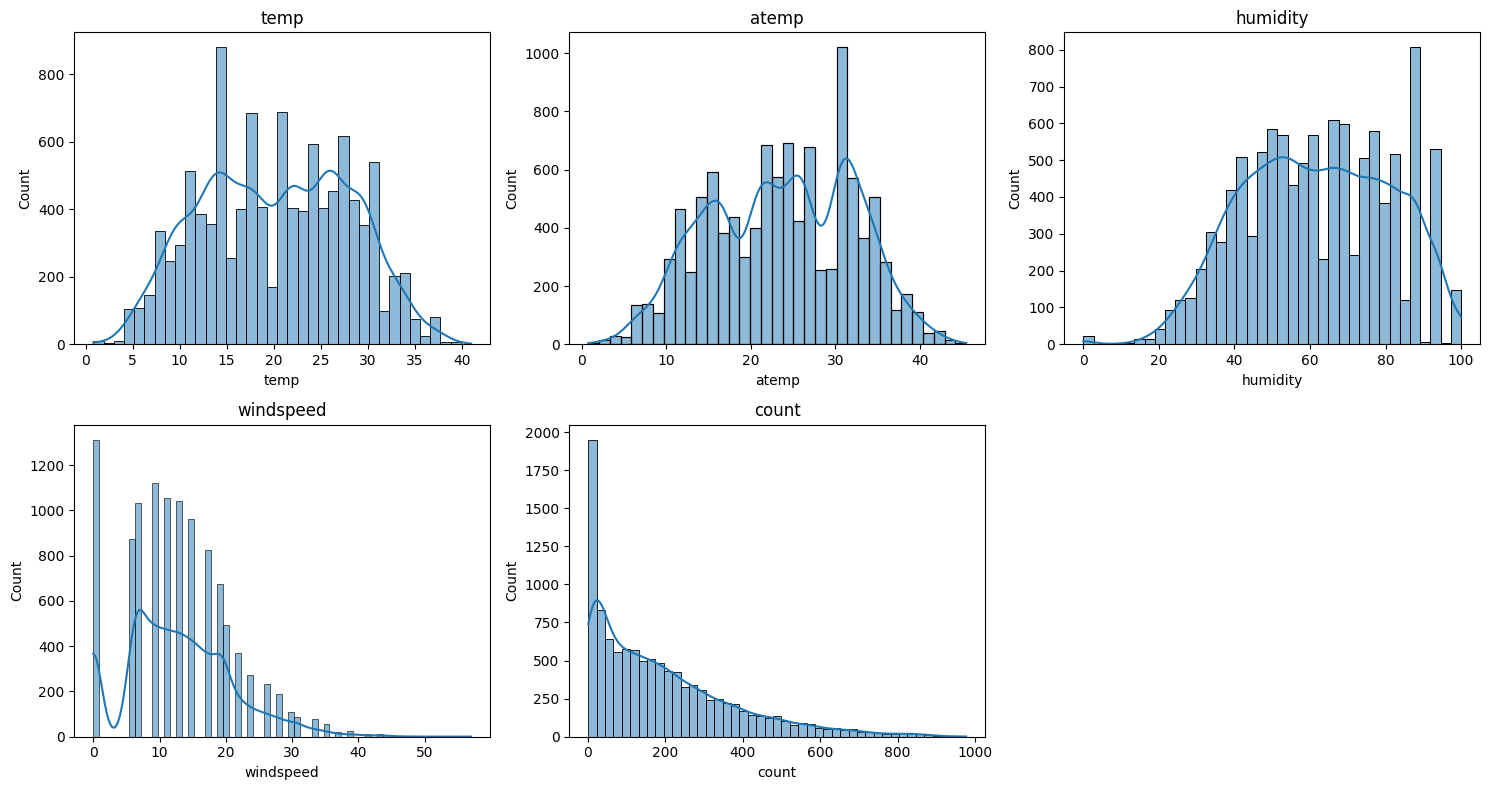

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
cont_var = ['temp','atemp','humidity','windspeed','count']

# Define subplot grid (approx. square layout)
n_cols = 3   # number of plots per row (you can adjust this)
n_rows = math.ceil(len(cont_var) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))  # adjust figure size

for i, col in enumerate(cont_var, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(x=bike_df[col],kde=True)
    plt.title(f"{col}", fontsize=12)
    plt.tight_layout()

plt.show()

**Insights**:-

1.   Bike rentals happen across a wide range of temperatures, with demand drops only at the extremes.
2.   Higher windspeed and extremely low humidity seem to reduce rentals.
3.   Rental counts are highly variable but most trips are in the lower range, suggesting spikes during specific periods/events.
4.   Outlier management and transformation might be useful for windspeed and count variables due to their skewed distributions.





##**Bivariate Analysis**

###Count the number of bike rented on weekday

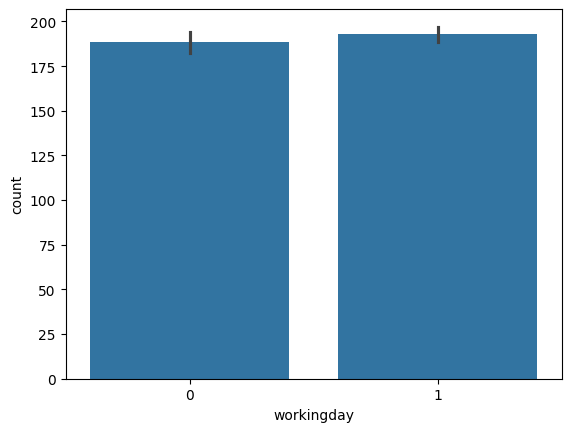

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.barplot(data=bike_df,x='workingday',y='count')
plt.show()


**Insights** :- The demand for bike rentals does not differ substantially between working days and non-working days; usage is almost equally high on both, indicating that both commuters and leisure riders contribute to demand. Further analysis or statistical testing would be needed to confirm if the difference is meaningful.

###Count the number of bike shared as per season

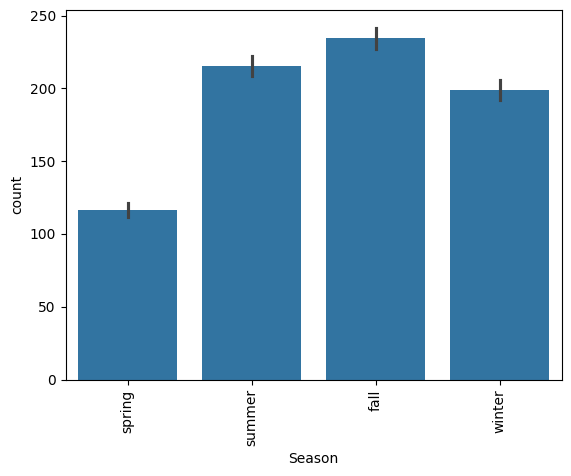

In [ ]:
sns.barplot(data=bike_df,x='season_name',y='count')
plt.xlabel('Season')
plt.xticks(rotation=90)
plt.show()

**Insights** :- Bike rental demand is highest in fall and summer, moderate in winter, and lowest in spring. This suggests that weather, likely temperature and comfort, influences user demand, with peak ridership during warmer and likely drier seasons. Yulu could target promotions or service expansion during summer and fall for maximum impact.

###Count the number of bike shared as per season

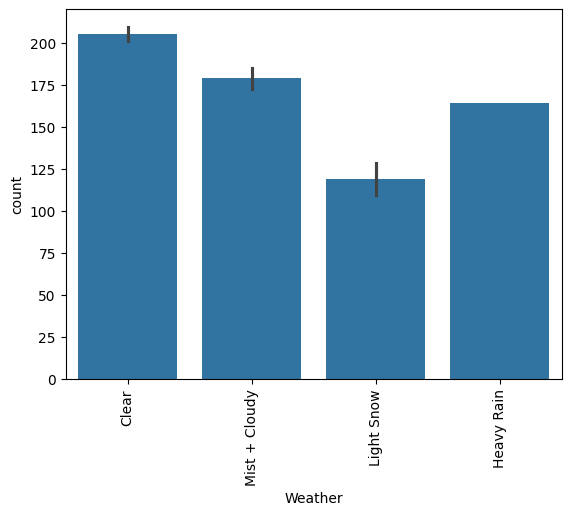

In [ ]:
sns.barplot(data=bike_df,x='weather_name',y='count')
plt.xlabel('Weather')
plt.xticks(rotation=90)
plt.show()

**Insights** :- Bike rentals are highest on clear days. Usage declines with poorer weather, especially during snow and rain, showing that weather significantly affects bike rental demand. Yulu should anticipate lower demand in adverse weather and may benefit from weather-based promotions or operational adjustments.

#**Hypothesis Testing**

##**2-Sample T- Test to check whether: Working Day has effect on number of electric cycles rented (take alpha=0.05)**


In [ ]:
#Ho: working day has no efecct on no.of cycles rented"
#Ha : working day has an effect on no.of cycles rented"

from scipy.stats import ttest_ind

alpha=0.05

# Perform independent 2-sample t-test
t_stat, p_value = ttest_ind(bike_df['workingday'], bike_df['count'])

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < alpha :
  print(f"p_value : {p_value} -> Ho rejected : working day has an effect on no.of cycles rented")
else :
  print(f"p_value : {p_value} -> Failed to reject Ho : working day has no efecct on no.of cycles rented")

T-statistic: -109.95076974934595
P-value: 0.0
p_value : 0.0 -> Ho rejected : working day has an effect on no.of cycles rented


##**To check if no. of cycles rented is similar or different in different weather and season**

###Shapiro Test - check for Normality

In [ ]:
from scipy.stats import shapiro

stat_a,pvalue_a= shapiro(bike_df['weather'])
stat_b, pvalue_b = shapiro(bike_df['season'])
stat_c, pvalue_c = shapiro(bike_df['count'])

print("Shapiro-Wilk test results:")
print("weather :", pvalue_a, " ; Normally distributed" if pvalue_a > 0.05 else " ; Not normally distributed")
print("season :", pvalue_b, " ; Normally distributed" if pvalue_b > 0.05 else " ; Not normally distributed")
print("count :", pvalue_c, " ; Normally distributed" if pvalue_c > 0.05 else " ; Not normally distributed")

Shapiro-Wilk test results:
weather : 9.741630538083577e-91  ; Not normally distributed
season : 2.250753004272159e-71  ; Not normally distributed
count : 5.369837893115507e-68  ; Not normally distributed


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10886.
  res = hypotest_fun_out(*samples, **kwds)


###Levene's Test - test of variance

In [ ]:
from scipy.stats import levene

# Levene’s test for equality of variances
stat_levene, pvalue_levene = levene(bike_df['count'],bike_df['weather'],bike_df['season'])
print('Levene test p-value:', pvalue_levene)

if pvalue_levene < 0.05:
   print("Variances are not equal")
else:
   print("Variances are equal")

Levene test p-value: 0.0
Variances are not equal


Since normality and variance assumptions has not met. Hence, kruskal wallis test need to be used instead of Anova.

###Kruskal-Wallis -> To check the effect of different weather on no.of cycles rented

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
stat_kruskal, p_value_kruskal = kruskal(bike_df['count'],bike_df['weather'])

print("Kruskal-Wallis test result:")
print("H-statistic:", stat_kruskal)
print("P-value:", p_value_kruskal)

alpha = 0.05
if p_value_kruskal < alpha:
   print("\nReject H₀ -> there is an effect of different weather on no.of cycles rented")
else:
   print("\nFail to reject H₀ → there is an effect of diiferent weather on no.of cycles rented")

Kruskal-Wallis test result:
H-statistic: 16371.826651941374
P-value: 0.0

Reject H₀ -> there is an effect of different weather on no.of cycles rented


###Kruskal-Wallis -> To check the effect of different weather on no.of cycles rented

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
stat_kruskal, p_value_kruskal = kruskal(bike_df['count'],bike_df['season'])

print("Kruskal-Wallis test result:")
print("H-statistic:", stat_kruskal)
print("P-value:", p_value_kruskal)

alpha = 0.05
if p_value_kruskal < alpha:
   print("\nReject H₀ -> there is an effect of different season on no.of cycles rented")
else:
   print("\nFail to reject H₀ → there is an effect of diiferent season on no.of cycles rented")

Kruskal-Wallis test result:
H-statistic: 15010.363855142248
P-value: 0.0

Reject H₀ -> there is an effect of different season on no.of cycles rented


###Kruskal-Wallis ->To check the effect of both weather and season together on count of no.of cycles rented

In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
stat_kruskal, p_value_kruskal = kruskal(bike_df['count'],bike_df['weather'],bike_df['season'])

print("Kruskal-Wallis test result:")
print("H-statistic:", stat_kruskal)
print("P-value:", p_value_kruskal)

alpha = 0.05
if p_value_kruskal < alpha:
   print("\nReject H₀ -> there is an effect of diiferent weather and season on no.of cycles rented")
else:
   print("\nFail to reject H₀ → there is an effect of diiferent weather and season on no.of cycles rented")

Kruskal-Wallis test result:
H-statistic: 23494.03517528221
P-value: 0.0

Reject H₀ -> there is an effect of diiferent weather and season on no.of cycles rented


###Chi-square test -> to check if Weather is dependent on the season

In [ ]:
#Ho:"Weather and season are independent."
#Ha:"Weather and season are dependent."

from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table (cross-tabulation) between two categorical variables
contingency_table = pd.crosstab(bike_df['weather'], bike_df['season'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

if p_value < 0.05:
  print("Ho rejected : Weather and season are dependent")
else :
  print("Failed to reject Ho : Weather and season are independent")


Chi-square Statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Degrees of Freedom: 9
Expected Frequencies Table:
 [[1.80559765e+03 1.77454639e+03 1.80559765e+03 1.80625831e+03]
 [2.51056403e-01 2.46738931e-01 2.51056403e-01 2.51148264e-01]
 [2.15657450e+02 2.11948742e+02 2.15657450e+02 2.15736359e+02]
 [7.11493845e+02 6.99258130e+02 7.11493845e+02 7.11754180e+02]]
Ho rejected : Weather and season are dependent


#**Overall Insights**:

1.   **Demand Drivers**: Weather, season, and (to a lesser extent) workingday status all significantly affect electric bike demand. Clear and pleasant weather and the fall and summer seasons have the greatest positive impact on shared cycle usage.
2.   **Demand Stability**: No significant difference was observed between working and non-working days, suggesting utility for both commuting and leisure.
3.   **Outlier & Data Distribution**: Several continuous variables (windspeed, count) are highly skewed, so robust modeling or data transformation may be warranted.



#**Business Recommendations:**

1.   **Weather-Responsive Operations**: Deploy more bikes and marketing campaigns in anticipation of clear and favorable weather, and scale back or offer promotions during heavy rain or snow.
2.   **Seasonal Promotion**: Invest in targeted offers during fall and summer when natural demand is high, and use discounts or bundled rides to stimulate demand in spring and winter.
3.   **Broad User Targeting**: As working and non-working days show similar demand, continue catering to both commuter and leisure customer segments.



#**Link to access the notebook**

https://colab.research.google.com/drive/1gOPcoUZ8wcsnNYe1ZCxMn41pC9hausK9?usp=sharing